In [237]:
#impoting my libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter 

#data proprocessing 
from sklearn.model_selection import train_test_split

# importing predictive classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# importing metrics for MODEL EVALUATION
from sklearn.metrics import (classification_report,
    confusion_matrix,
    mean_squared_error,
    mean_absolute_error,
    r2_score
)
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing my data in the python environment 
file = pd.read_csv('Customer-Churn.csv')
file.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [3]:
#getting and overview of the data set 
file.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [4]:
#chekc for duplicates in the data 
duplicate_val= file.duplicated().sum()
print("Number of duplicated values is "+ str(duplicate_val))

Number of duplicated values is 0


In [5]:
#checking for missing values 
file.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Observaton:
-there are no missing values in the data
-there are no duplicate values in the data

In [6]:
#Getting an overview of the numerical data 
file.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


OBSERVATIONS:
- The numerical data are, SeniorCitizen, tenure and MonthlyCharges
- The mean nd median for the tenure are marginaly different, meaning there are little or no outliers  
- The mean and median for the MonthlyCharges are marginally different as well,  meaning there are little or no outliers

In [7]:
#Getting an overview of the categorical data
file.describe(exclude =['int64', 'float64']).T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


OBSERVATIONS 
- For internet service, fibre optic is the most occuring 
- For the customer contract month to month contract is the most frequent 
- For payment method, electronic check is the most used payment method.

### EXPLORATORY DATA ANALYSIS 



UNIVARIATE DATA ANALYSIS
- The features in the data will be split into 4 categories, where univariate analysis will be carried out on each
of the features in all catgories.
- The main feature:
    * Churn
- Category 1 is the personal customer features:
    * partner
    * gender
    * Dependant
    * Phone services 
    * multiple lines
    * internet services 
- Category 2 is the Security features:
    * Online security
    * Online backup
    * Device protection 
    * Tech Support 
- Category 3 is the commercial features:
    * Contract
    * Paperlessbilling 
    * payment method
    * Total Charges
- Category 4 is the numerical data:
    * Senior Citizen
    * Tenure
    * Monthly charges 
    

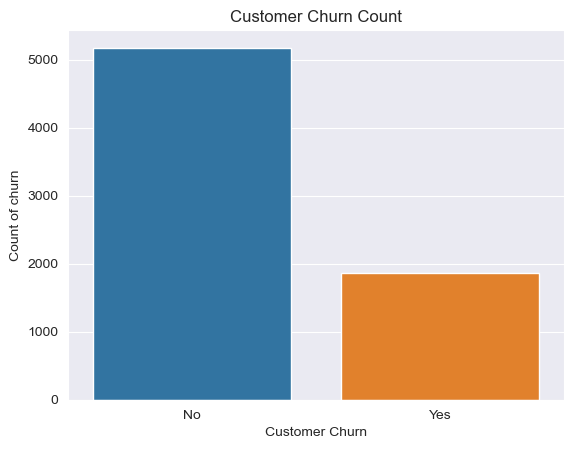

In [8]:
#Univarite analysis on customer churn
sns.set_style("darkgrid")
ax = sns.countplot(data = file, x= 'Churn')
plt.xlabel('Customer Churn')
plt.ylabel('Count of churn')
plt.title('Customer Churn Count');

In [9]:
value = file.Churn.value_counts()
val_percentage = (value/len("Churn")*100)
val_percentage

No     103480.0
Yes     37380.0
Name: Churn, dtype: float64

OBSERVATION
- Customer churn count is 37380 and 103480 for non customer churn. 

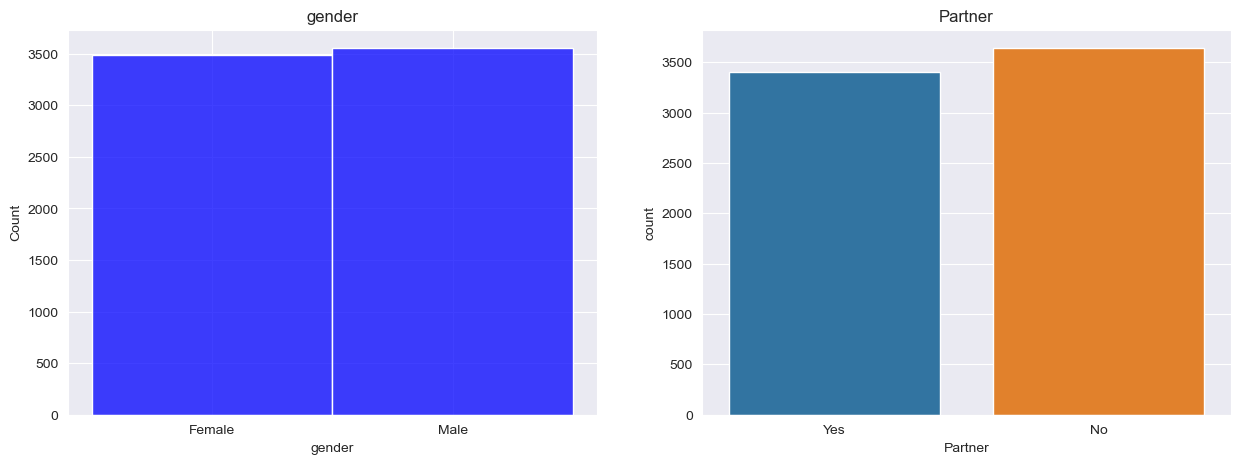

In [10]:
#Univariant analysis on category 1, Personal customer features ( Gender and Partner)
sns.set_style("darkgrid")
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize=(15,5) )
ax = sns.histplot(data=file, x= 'gender', color = 'blue', ax=axs[0])
axs[0].set_title("gender")
ax = sns.countplot(data=file, x= 'Partner', ax=axs[1])
axs[1].set_title("Partner");

In [11]:
#value count of the gender up data
value = file.gender.value_counts()
val_percentage = (value/len("gender")*100)
val_percentage

Male      59250.000000
Female    58133.333333
Name: gender, dtype: float64

In [12]:
#value count of the Partner up data
value = file.Partner.value_counts()
val_percentage = (value/len("Partner")*100)
val_percentage

No     52014.285714
Yes    48600.000000
Name: Partner, dtype: float64

OBSERVATION
- There is relatively no influence of the gender feature on customer churn as both male and female data
are relatively the same.
- There is relatively no influence of the partner feature on customer churn as having a partner or not are
 relatively equal.

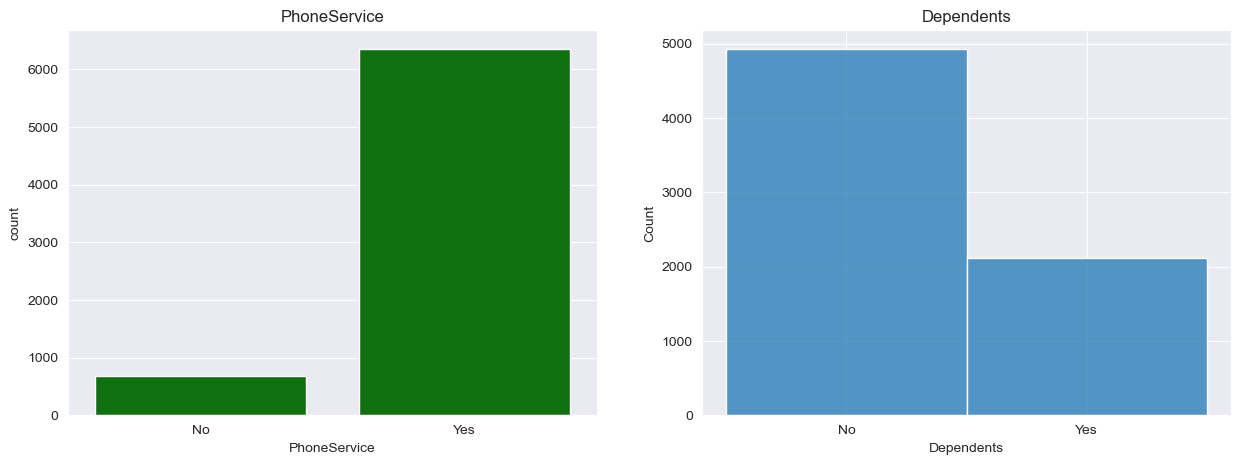

In [13]:
#Univariant analysis on category 1, Personal customer features (Phone services and dependant)
sns.set_style("darkgrid")
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize=(15,5) )
ax = sns.countplot(data=file, x= 'PhoneService', color= 'green', ax=axs[0])
axs[0].set_title("PhoneService");
ax = sns.histplot(data=file, x= 'Dependents', ax=axs[1])
axs[1].set_title("Dependents");

In [14]:
file.PhoneService.value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [15]:
file.Dependents.value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

OBSERVATIONS
- The number of customers using phone services is significantly high compared to the customer not using, this shows that phone servcies is good and is not a variable to warrant customer churn. 
- The number of customers with bo dependants is high compared to customers with dependants, meaning this could be a variable to consider with regards to customer churn.

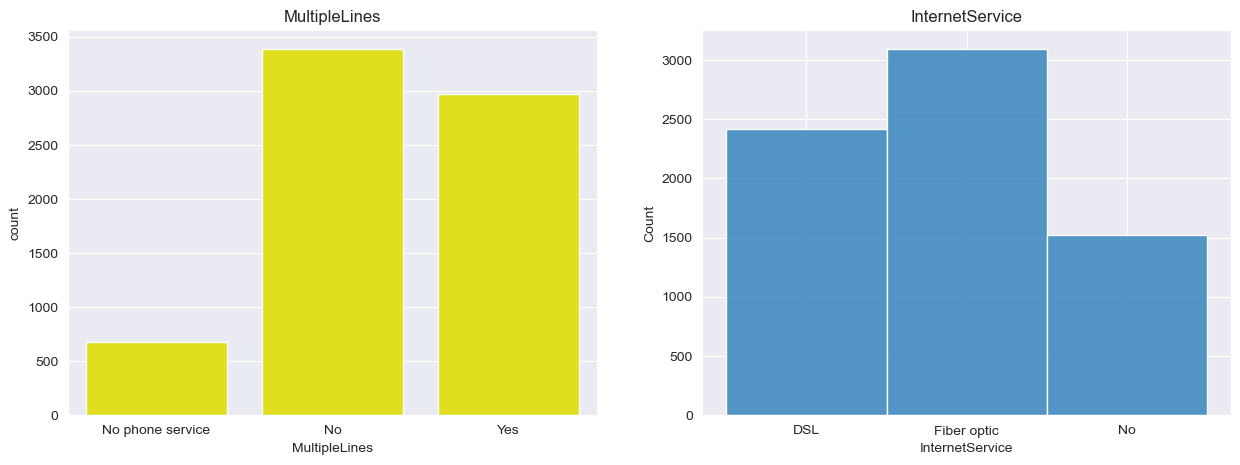

In [16]:
#Univariant analysis on category 1, Personal customer features (multiple lines and internet services )
sns.set_style("darkgrid")
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize=(15,5) )
ax = sns.countplot(data=file, x= 'MultipleLines',color = 'yellow', ax=axs[0])
axs[0].set_title("MultipleLines");
ax = sns.histplot(data=file, x= 'InternetService', ax=axs[1])
axs[1].set_title("InternetService");

In [17]:
file.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [18]:
file.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

OBSERVATIONS
- Number of customers not using multiple lines (3390) is higher than (2971) customers using multiple line this difference is not so significant, and (682)customers without phone service. This variable may not be consideered for bivariate analysis with cutsomer churn, as the diference is not significant enough. 

- Fibre optics internet service is prefered to DSL and a significant number of customers do not have internet service. Though this variable is not considered as varibale for customer churn, the total charges generated by each internet service will be evaluated to get a better picture of the influence of the variable on customer churn. 

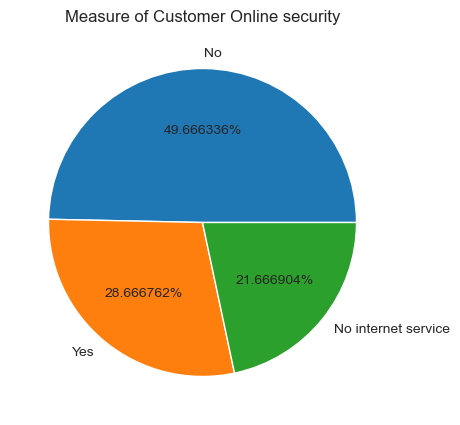

In [19]:
#Univariate analysis on category 2, security features online security 
fig, ax = plt.subplots(figsize=(10,5))
count = Counter(file["OnlineSecurity"])
plt.title('Measure of Customer Online security')
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%');


OBSERVATION
- The percentage of customers (50%) without online security is significantly high. With (22%) of customers without internet
service and just (29%) with internet service, this is a possible reason of customer churn. 

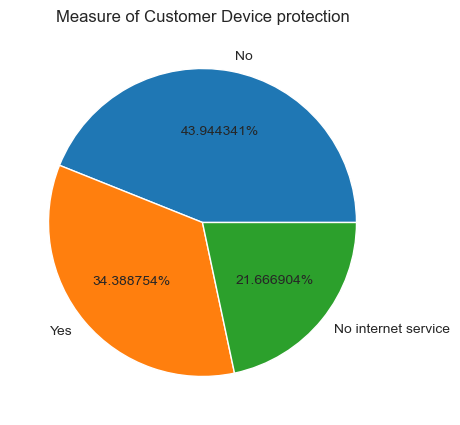

In [20]:
#Univariate analysis on category 2, security feature -  device protection
fig, ax = plt.subplots(figsize=(15,5))
count = Counter(file["DeviceProtection"])
plt.title("Measure of Customer Device protection")
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:2f}%');


OBSERVATION
- There is a significant percentage (44%) of customers who do nOt have online device protection and  (22%) with no
internet service, while just (35%) of the customers have device protection. This factor could lead to customer churn 

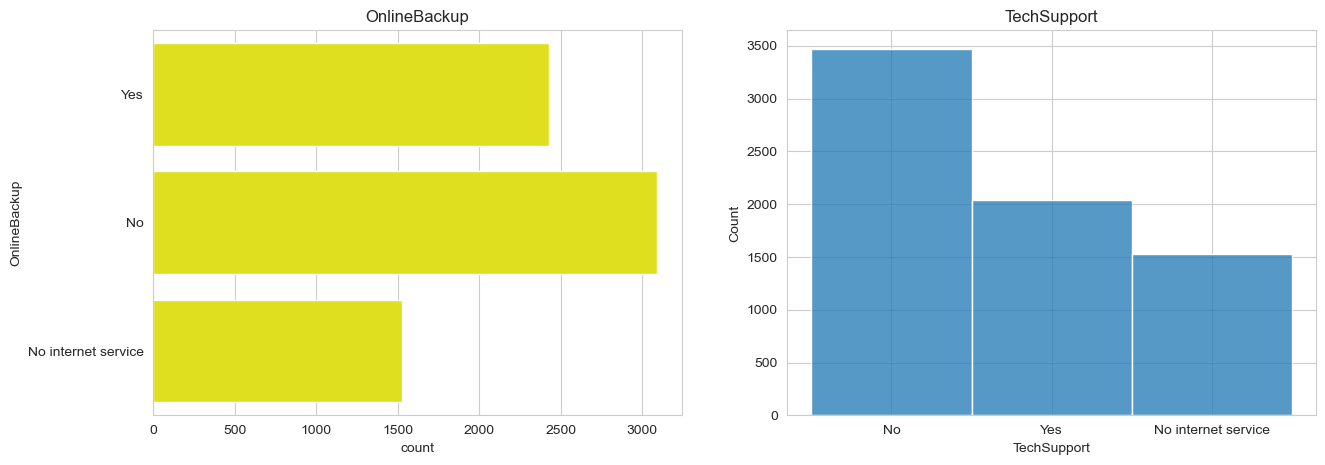

In [21]:
#Univariate analysis on category 2, security features-  online backup and tech support 
sns.set_style("whitegrid")
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize=(15,5) )
ax = sns.countplot(data=file, y= 'OnlineBackup', color= 'yellow', ax=axs[0])
axs[0].set_title("OnlineBackup");
ax = sns.histplot(data=file, x= 'TechSupport', ax=axs[1])
axs[1].set_title("TechSupport");

In [22]:
#value count of the online back up data
value = file.OnlineBackup.value_counts()
val_percentage = (value/len("OnlineBackup")*100)
val_percentage

No                     25733.333333
Yes                    20241.666667
No internet service    12716.666667
Name: OnlineBackup, dtype: float64

In [23]:
#value count of the TechSupport data
value = file.TechSupport.value_counts()
val_percentage = (value/len("TechSupport")*100)
val_percentage

No                     31572.727273
Yes                    18581.818182
No internet service    13872.727273
Name: TechSupport, dtype: float64

OBSERVATIONS
- The number of customers using the online back up (20241) is lower than (25733) customers not using online back
up, and (12716) not using the internet service. this variable could lead to customer churn but the difference is not 
significant enough to consider for bivariate analysis with customer churn. 

- The number of customers using the Technical supprt (18581) is lower than (31572) customers not using technical support
,and (13872) not using the internet service. This variable is a possible reason for customer churn.


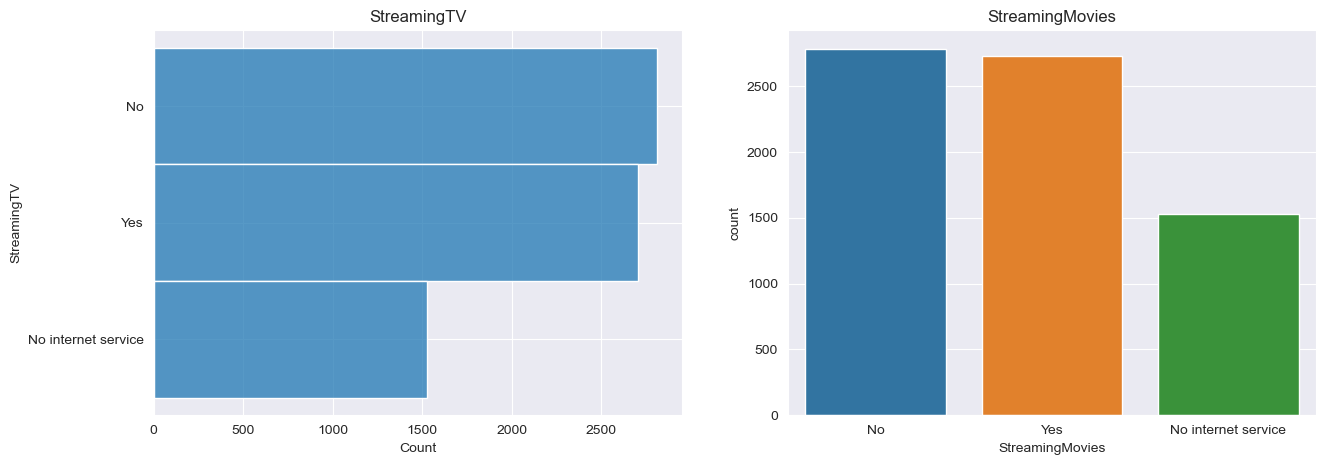

In [24]:
#Univariant analysis on category 3, streaming features (streaming tv and  lines and streaming movies )
sns.set_style("darkgrid")
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize=(15,5) )
ax = sns.histplot(data=file, y= 'StreamingTV', ax=axs[0])
axs[0].set_title("StreamingTV");
sns.set_style("ticks")
ax = sns.countplot(data=file, x= 'StreamingMovies', ax=axs[1])
axs[1].set_title("StreamingMovies");

In [25]:
#value count of the StreamingTV  data
value = file.StreamingTV.value_counts()
val_percentage = (value/len("StreamingTV")*100)
val_percentage

No                     25545.454545
Yes                    24609.090909
No internet service    13872.727273
Name: StreamingTV, dtype: float64

In [26]:
#value count of the StreamingMovies  data
value = file.StreamingMovies.value_counts()
val_percentage = (value/len("StreamingMovies")*100)
val_percentage

No                     18566.666667
Yes                    18213.333333
No internet service    10173.333333
Name: StreamingMovies, dtype: float64

OBSERVATIONS
- The number of customers using the streamingTV service (24609) is lower than (25545) customers not using the service and 
(13872) with no internet service, this feature is a possible customer reason for customer churn.

- The number of customers using the Streaming movies service (18213) is lower than (18566) customers not using the service and 
(10173) with no Internet, this feature is a possible customer reason for customer churn.

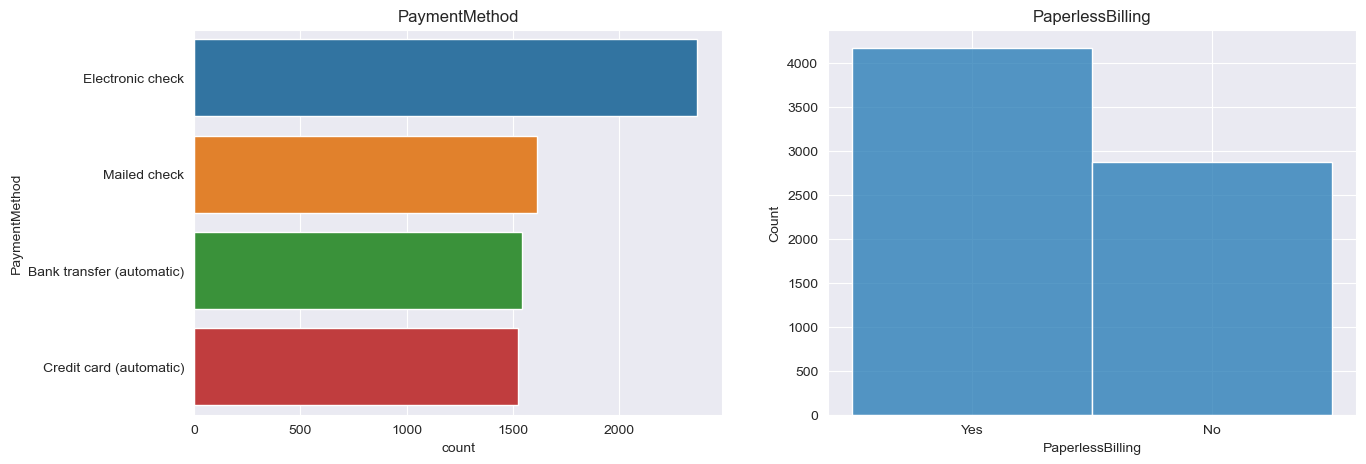

In [27]:
#Univariant analysis on category 4, comercial features (paperless billing and  payment method)
sns.set_style("darkgrid")
fig,axs = plt.subplots(nrows = 1, ncols= 2, figsize=(15,5) )
ax = sns.histplot(data=file, x= 'PaperlessBilling', ax=axs[1])
axs[0].set_title("PaymentMethod");
sns.set_style("ticks")
ax = sns.countplot(data=file, y= 'PaymentMethod', ax=axs[0])
axs[1].set_title("PaperlessBilling");

In [28]:
#value count of the PaymentMethod  data
value = file.PaymentMethod.value_counts()
val_percentage = (value/len("PaymentMethod")*100)
val_percentage

Electronic check             18192.307692
Mailed check                 12400.000000
Bank transfer (automatic)    11876.923077
Credit card (automatic)      11707.692308
Name: PaymentMethod, dtype: float64

In [29]:
#value count of the PaperlessBilling data
value = file.PaperlessBilling.value_counts()
val_percentage = (value/len("PaperlessBilling")*100)
val_percentage

Yes    26068.75
No     17950.00
Name: PaperlessBilling, dtype: float64

OBSERVATION
- The most prefered payment method is Electronic check with 18192 customers using this paymeent channel followed by
mailed check with 12400 customers, followed by automatic bank transfer with 11877 then credit card with 11707
customers using that payment channel.
- most customers prefere paperless billing with 26068 custommers using papaerless billing while 17590 customers
use papper billing method

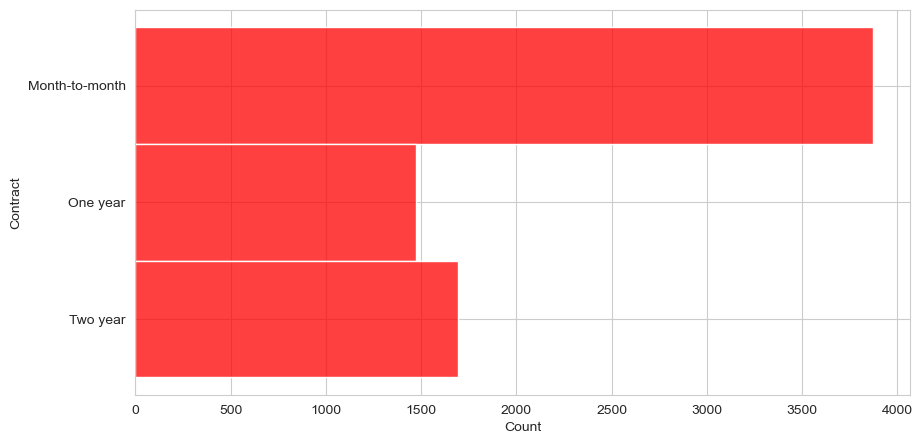

In [30]:
#univariate analysis for numerical data -  contract 
sns.set_style('whitegrid')
f,ax=plt.subplots(figsize=(10,5))
ax = sns.histplot(data = file, y ='Contract', color = 'red')

In [31]:
#value count of the Contract data
value = file.Contract.value_counts()
val_percentage = (value/len("Contract")*100)
val_percentage

Month-to-month    48437.5
Two year          21187.5
One year          18412.5
Name: Contract, dtype: float64

OBSERVATION
- Month-to-month contract type is the most prefered contract type by customers 

In [33]:
#investigate why the Totalcharges feture is catagorical and not numerical and convert to numerical
non_numeric_values = pd.to_numeric(file['TotalCharges'], errors='coerce').isnull()
file['TotalCharges'] = pd.to_numeric(file['TotalCharges'], errors='coerce')

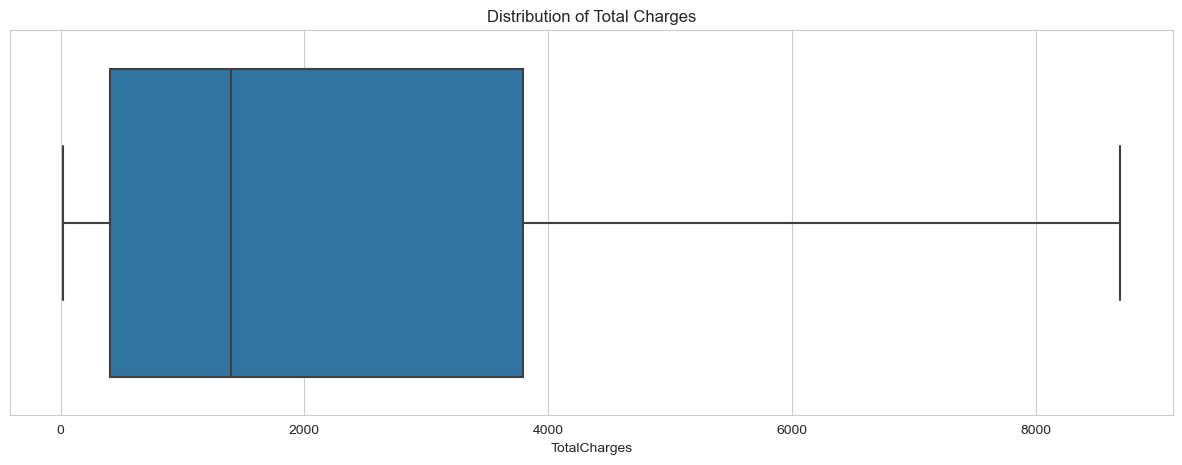

In [34]:
#univariate analysis for numerical data -  TotalCharges
f,ax = plt.subplots(figsize=(15,5))
ax = sns.boxplot(data = file, x = "TotalCharges",)
plt.title('Distribution of Total Charges');

OBSERVATION

-There are no outliers in the data

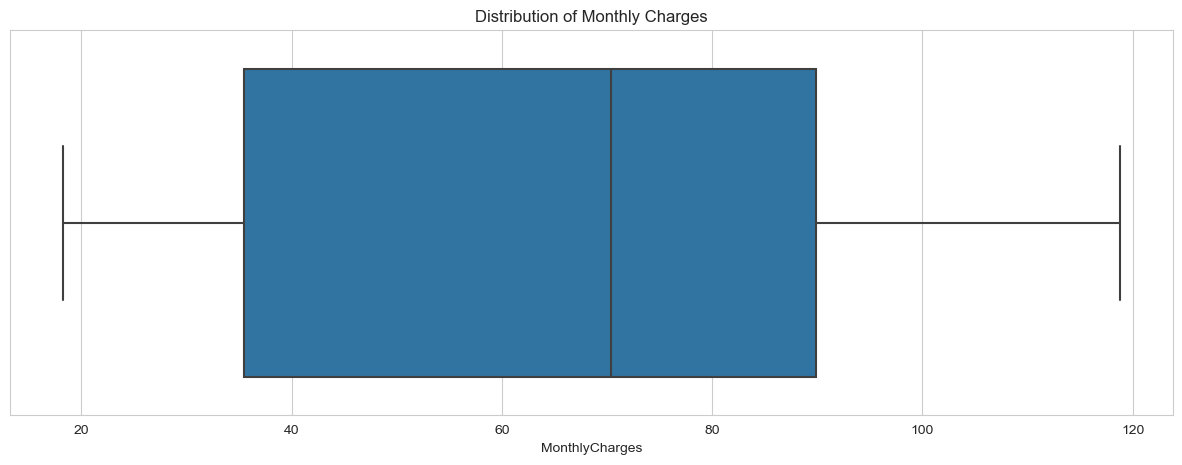

In [35]:
#univariate analysis for numerical data -  MonthlyCharges
f,ax = plt.subplots(figsize=(15,5))
ax = sns.boxplot(data = file, x = "MonthlyCharges")
plt.title('Distribution of Monthly Charges');

OBSERVATION
- There are no outliers in the data 

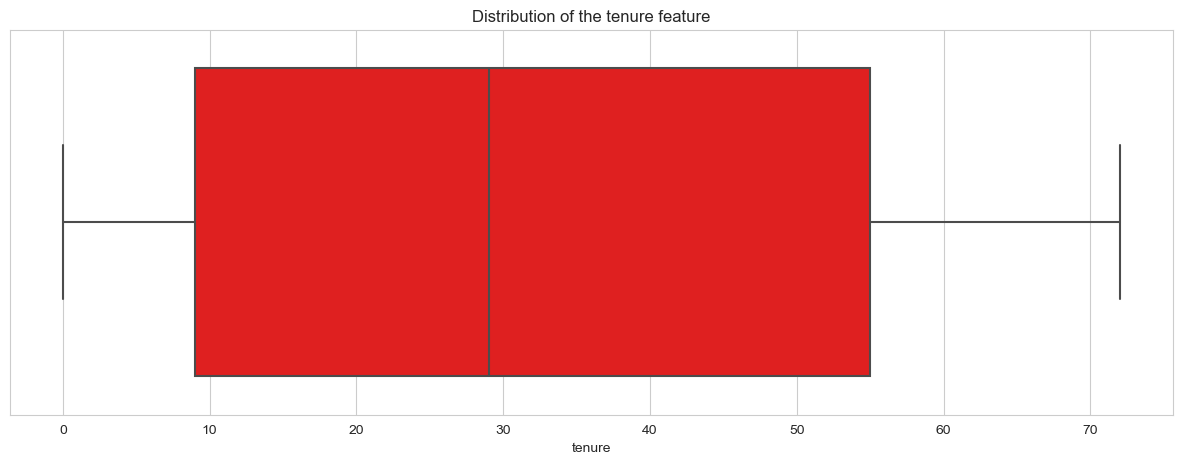

In [36]:
#univariate analysis for numerical data -  tenure
f,ax = plt.subplots(figsize=(15,5))
ax = sns.boxplot(data = file, x = "tenure", color = 'red')
plt.title('Distribution of the tenure feature');

OBSERVATION
- There are no outliers in the data 

In [37]:
#creating a cpy of the data as file2 
file2 = file.copy()
file2.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [38]:
#categorising the monthly payments
def Month_pay_cat(x):
     if x <= 35:
        return 'cat1(0-35.5)'
     elif x <= 70:
        return 'cat2(35-70.3)'
     elif x<= 89.8:
        return 'cat3(70.3 - 89.8)'
     else:
        return 'cat4(89.8 - 118.75)'
file2["Month_pay_cat"] = file2['MonthlyCharges'].apply(Month_pay_cat)


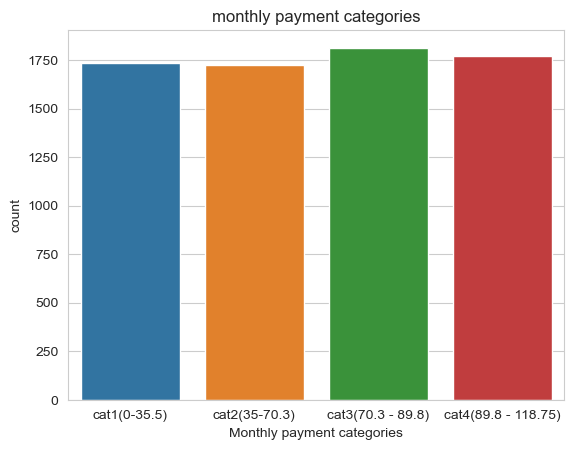

In [39]:
#visualising the monthly paymet categories 
sns.countplot(data = file2, x = 'Month_pay_cat')
plt.title("monthly payment categories")
plt.xlabel('Monthly payment categories');

OBSERVATION
- there exists no significant difference between the montly payment categories 

### BIVARIATE ANALYSIS
#### Considering bivariate analysis on various parameters of interest against customer churn

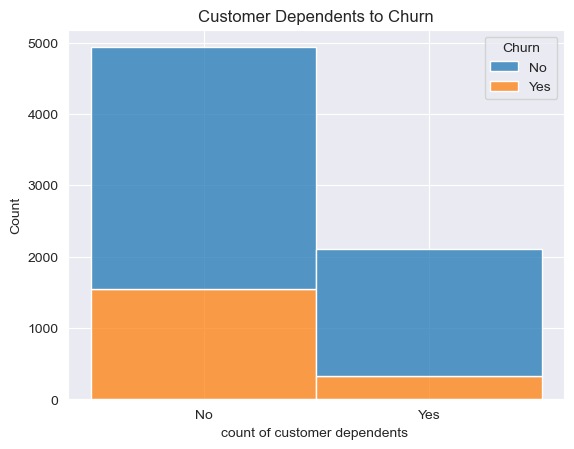

In [319]:
#customer churn against the dependants feature
ax=sns.histplot(data = file2, x = 'Dependents', hue = 'Churn', multiple = 'stack')
plt.title('Customer Dependents to Churn')
plt.xlabel('count of customer dependents ');

In [318]:
#count of the ccustomer dependents to customer churn
ss = file2.groupby(['Dependents', 'Churn']).size().reset_index(name = 'count')
ss

,Dependents,Churn,count
0,No,No,3390
1,No,Yes,1543
2,Yes,No,1784
3,Yes,Yes,326


OBSERVATIONS
- Number of customer with dependants is low compared to customer with dependants and in relation to customer churn,
thers is a below aveage number of customer churn with regards to both categories. 

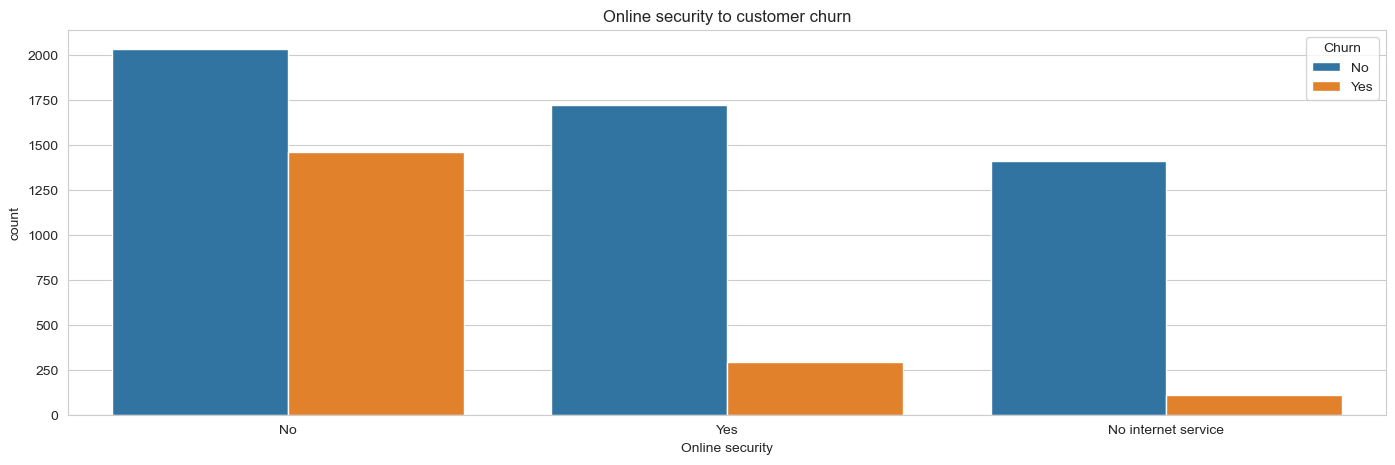

In [43]:
##customer churn against the online security feature
f,ax=plt.subplots(figsize=(17,5))
sns.countplot(data = file2, x= 'OnlineSecurity', hue = 'Churn')
plt.title('Online security to customer churn')
plt.xlabel('Online security');

In [44]:
#count of the online security to customer churn
ss = file2.groupby(['OnlineSecurity', 'Churn']).size().reset_index(name = 'count')
ss

,OnlineSecurity,Churn,count
0,No,No,2037
1,No,Yes,1461
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1724
5,Yes,Yes,295


OBSERVATIONS
- There is a high number of customer churn for customers with no online security

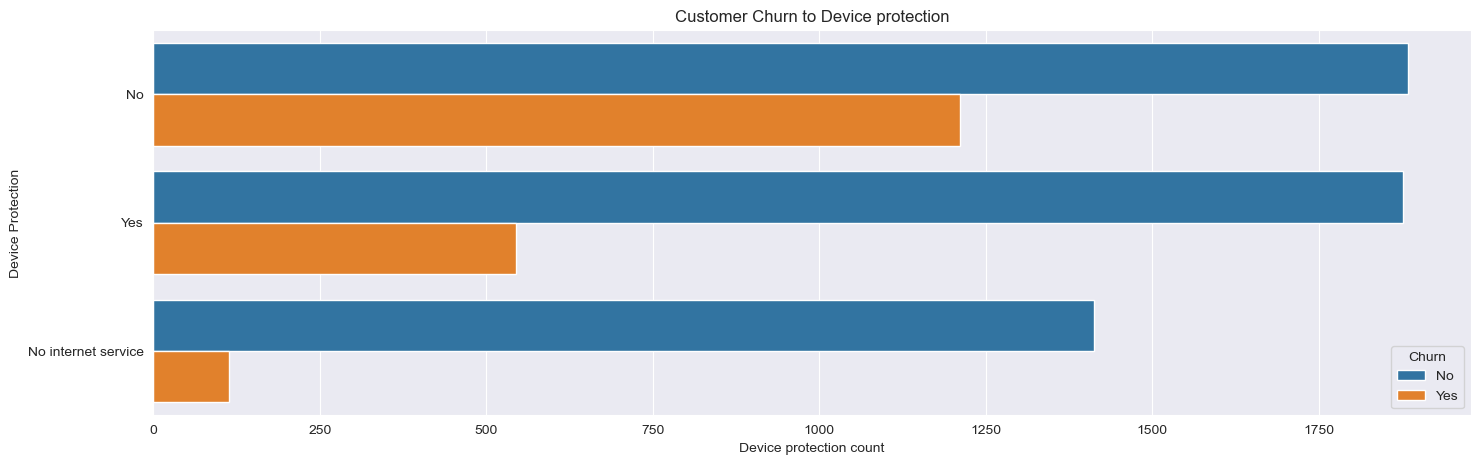

In [46]:
##customer churn against the online device protection feature
sns.set_style('darkgrid')
f,ax=plt.subplots(figsize=(17,5))
sns.countplot(data = file2, y= 'DeviceProtection', hue = 'Churn')
plt.title('Customer Churn to Device protection')
plt.ylabel('Device Protection')
plt.xlabel('Device protection count');

In [47]:
ss = file2.groupby(['DeviceProtection', 'Churn']).size().reset_index(name = 'count')
ss

,DeviceProtection,Churn,count
0,No,No,1884
1,No,Yes,1211
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1877
5,Yes,Yes,545


OBSERVATIONS
- There is a high number of customer churn for customers with no device protection compared to customers with device 
protection and no internet service

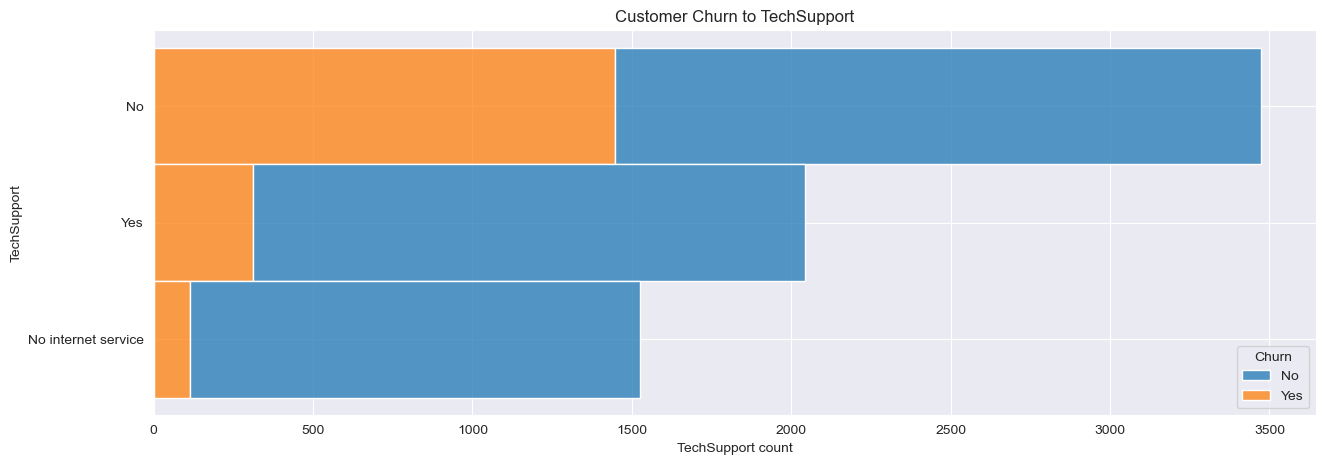

In [49]:
sns.set_style('darkgrid')
f,ax=plt.subplots(figsize=(15,5))
ax=sns.histplot(data = file2, y= 'TechSupport', hue = 'Churn', multiple = 'stack', color = 'orange')
plt.title('Customer Churn to TechSupport')
plt.ylabel('TechSupport')
plt.xlabel('TechSupport count');

In [50]:
#count of Techsupprt to custome churn 
ss = file2.groupby(['TechSupport', 'Churn']).size().reset_index(name = 'count')
ss

,TechSupport,Churn,count
0,No,No,2027
1,No,Yes,1446
2,No internet service,No,1413
3,No internet service,Yes,113
4,Yes,No,1734
5,Yes,Yes,310


OBSERVATIONNS 
- There is a high number of customer churn for customers with no Tech support compared to customers with Tech support
and no internet service

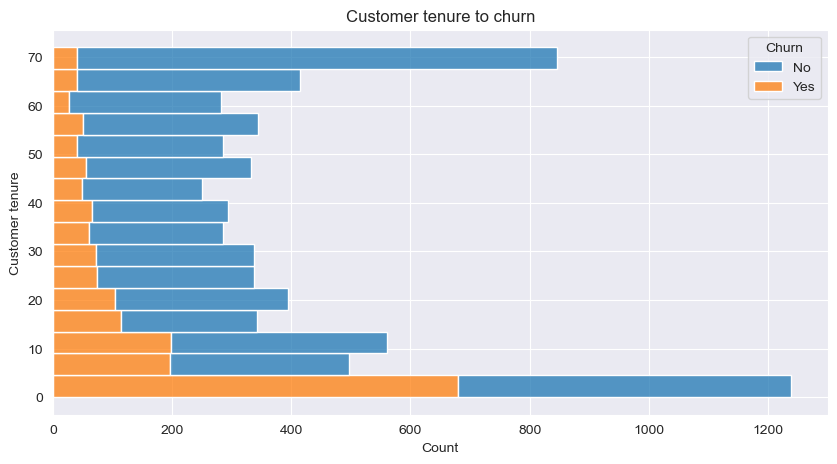

In [51]:
#analysing cutomer churn against tenure
f,ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data =file, y ='tenure', hue ='Churn', multiple = 'stack')
plt.title('Customer tenure to churn')
plt.ylabel('Customer tenure');

OBSERVATIONS
- Customers with high tenure have the highest churn counts.

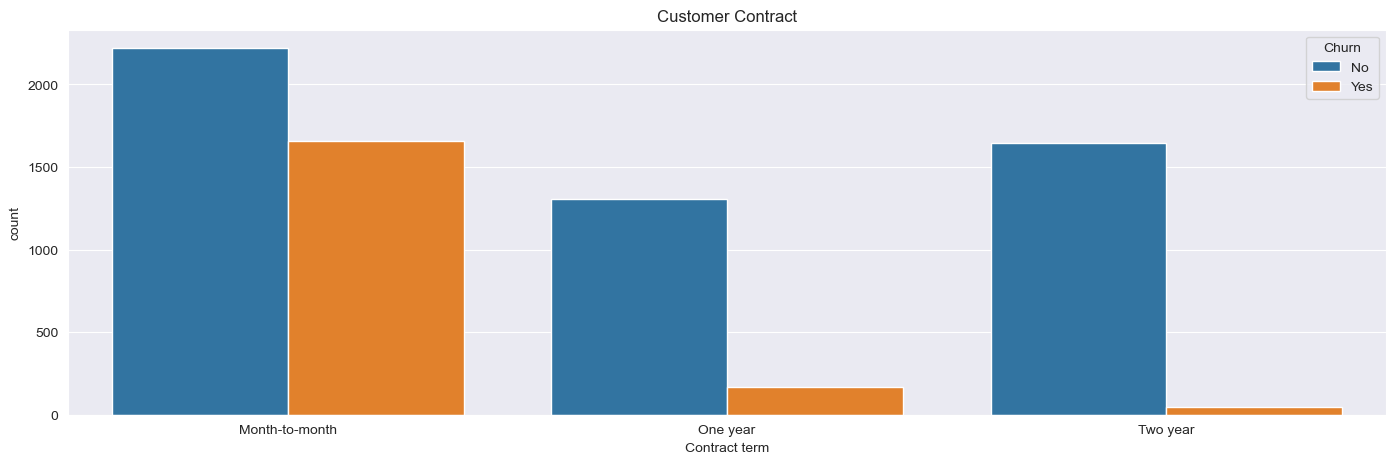

In [52]:
f,ax = plt.subplots(figsize=(17,5))
ax = sns.countplot(data =file2, x ='Contract', hue ='Churn')
plt.title('Customer Contract')
plt.xlabel('Contract term');

In [53]:
#count of contract term to customer churn
ss = file2.groupby(['Contract', 'Churn']).size().reset_index(name = 'count')
ss

,Contract,Churn,count
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1307
3,One year,Yes,166
4,Two year,No,1647
5,Two year,Yes,48


OBSERVATIONS
- Month-to-month contracts have the highest number of customers and also records the highet number of customer churn.
- Customers on two year contracts have the second highest count close to Month-to-month contract customers, 
but with a low percentage of customer churn


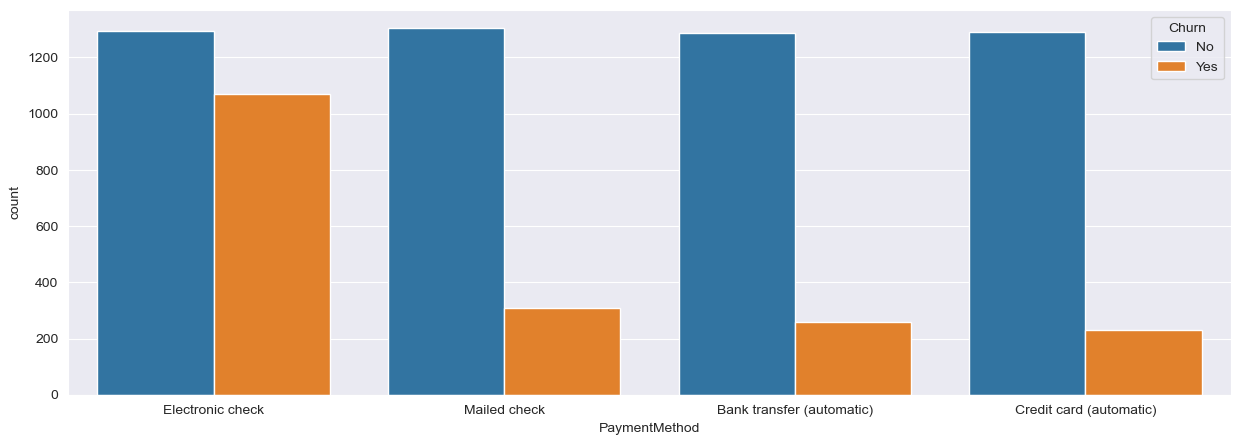

In [54]:
#exploring the payment method agaist customer churn
f,ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(data =file2, x ='PaymentMethod', hue ='Churn')


In [55]:
#count of payment method to customer churn
ss = file2.groupby(['PaymentMethod', 'Churn']).size().reset_index(name = 'count')
ss

,PaymentMethod,Churn,count
0,Bank transfer (automatic),No,1286
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1290
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1304
7,Mailed check,Yes,308


OBSERVATIONS
- Customers on all payment methods are relatively the same count, but electronic check has the highest customer churn 
count, that is 3 times the average for payment methods.

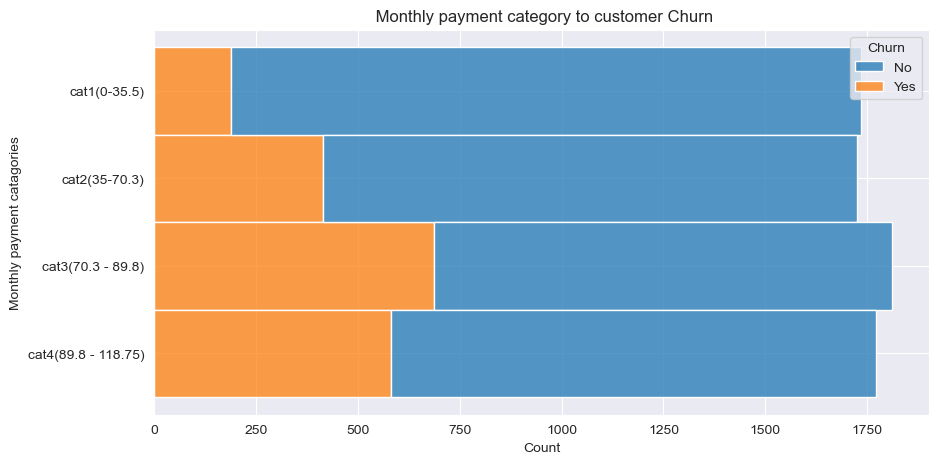

In [56]:
#Exploring the monthly payment catagories against customer churn
f, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data = file2, y= "Month_pay_cat", hue = 'Churn', multiple = 'stack')
plt.title(" Monthly payment category to customer Churn")
plt.ylabel('Monthly payment catagories')
plt.xlabel('Count');

In [57]:
#count of churn for different monthly payment categories
ss = file2.groupby(['Month_pay_cat', 'Churn']).size().reset_index(name = 'count')
ss

,Month_pay_cat,Churn,count
0,cat1(0-35.5),No,1546
1,cat1(0-35.5),Yes,189
2,cat2(35-70.3),No,1312
3,cat2(35-70.3),Yes,413
4,cat3(70.3 - 89.8),No,1125
5,cat3(70.3 - 89.8),Yes,687
6,cat4(89.8 - 118.75),No,1191
7,cat4(89.8 - 118.75),Yes,580


OBSERVATIONS
- customers on monthly payment category3(70.3 - 89.8) and category4 (89.8 - 118.75) have the highest count of customer churn

## Multivariate Analysis

#### For the multivariate analysis all categorical features are converted to numerical


In [58]:

#converting gender categorical features to numerical 
def sex(x):
    if x == 'Male':
        return 1
    else:
        return 0
file2['sex']= file2['gender'].apply(sex)

#converting partner categorical feature to numerical
def partner(x):
    if x == 'Yes':
        return 1
    else:
        return 0
file2['partner']= file2['Partner'].apply(partner)

#converting dependent categorical feature to numerical
def dependents(x):
    if x == 'Yes':
        return 1
    else:
        return 0
file2['dependents']= file2['Dependents'].apply( dependents)

#converting Phoneservices categorical feature to numerical
def phoneservices(x):
    if x == 'Yes':
        return 1
    else:
        return 0
file2['phoneservices']= file2['PhoneService'].apply(phoneservices)

#converting mulitplelines categorical feature to numerical
def mulitplelines(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return 2
file2['mulitplelines']= file2['MultipleLines'].apply(mulitplelines)

#converting InternetService categorical feature to numerical
def internetservice(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return 2
file2['internetservice']= file2['InternetService'].apply(internetservice)

#converting OnlineSecurity categorical feature to numerical
def onlinesecurity(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return 2
file2['onlinesecurity']= file2['OnlineSecurity'].apply(onlinesecurity)

#converting OnlineBackup categorical feature to numerical
def onlinebackup(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return 2
file2['onlinebackup']= file2['OnlineBackup'].apply(onlinebackup)

#converting DeviceProtection categorical feature to numerical
def deviceprotection(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return 2
file2['deviceprotection']= file2['DeviceProtection'].apply(deviceprotection)

#converting TechSupport categorical feature to numerical
def techsupport(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return 2
file2['techsupport']= file2['TechSupport'].apply(techsupport)

#converting StreamingTV categorical feature to numerical
def streamingtv(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return 2
file2['streamingtv']= file2['StreamingTV'].apply(streamingtv)

#converting StreamingMovies categorical feature to numerical
def streamingmovies(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    else:
        return 2
file2['streamingmovies']= file2['StreamingMovies'].apply(streamingmovies)

#converting Contract categorical feature to numerical
def contract(x):
    if x == 'Month-to-month':
        return 0
    elif x == 'One year':
        return 1
    else:
        return 2
file2['contract']= file2['Contract'].apply(contract)

#converting PaperlessBilling categorical feature to numerical
def paperlessbilling(x):
    if x == 'Yes':
        return 1
    else:
        return 0
file2['paperlessbilling']= file2['PaperlessBilling'].apply(paperlessbilling)

#converting PaymentMethod categorical feature to numerical
def paymentmethod(x):
    if x == 'Electronic check':
        return 0
    elif x == 'Mailed check':
        return 1
    elif x == 'Bank transfer (automatic)':
        return 2
    else:
        return 3
file2['paymentmethod']= file2['PaymentMethod'].apply(paymentmethod)

#converting customer churn categorical features to numerical 
def churn(x):
    if x == 'Yes':
        return 1
    else:
        return 0
file2['churn']= file2['Churn'].apply(churn)


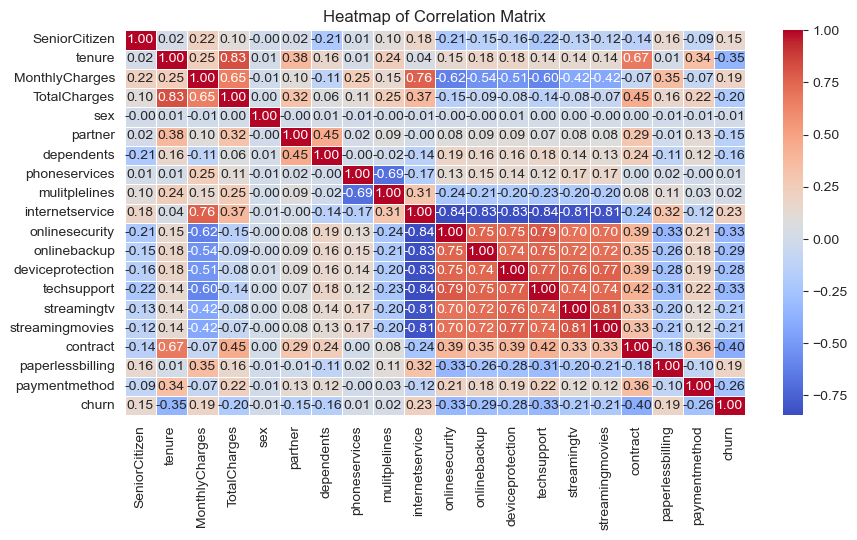

In [114]:
#Cprrelation matrix for multivariate analysis
correlation_matrix = file2.corr();
plt.figure(figsize=(10,5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show();


OBSERVATIONS
- There is positive correlation between the target variable 'church' and the following features:
    * paperless bill
    *internet servcie 
    * multiple lines 
    * phone services
    * monthly service 
    * senior citizen
- This positive correlation indicates the increase in the target variable(churn) a these features increase as well,
highlighting a direct relationship between the target variable(church) and the features with positive relation stated above.

- There is negative Correlation between the target variable 'churcn' and the following features:
    * payment method
    * contract
    * streaming movie
    * streaming tv 
    * tech support 
    * device protection
    * online backup 
    * online security
    * dependant
    * partner
    * sex
    * total charges 
    * tenure
- This negative correlation indicates when there is increase in these variables the target variable(churn)decrease,
highlighting an inverse relationship between the target variable(church) and the features with negative relation.

### Data Preprocessing 

In [185]:
file.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [186]:
file.duplicated().sum()

0

In [187]:
file.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [189]:
#ceching for missing values 
file3.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [206]:
#creating a copy of the data
data = file3.copy()

In [209]:
#performing one hot encoding to to convert categorical data to numerical
data = pd.get_dummies(data, drop_first = True)

In [212]:
#segregating the target variable from the data and asigning variables to data and target variable 
x = data.drop(columns=["Churn_Yes"])
y = data["Churn_Yes"]

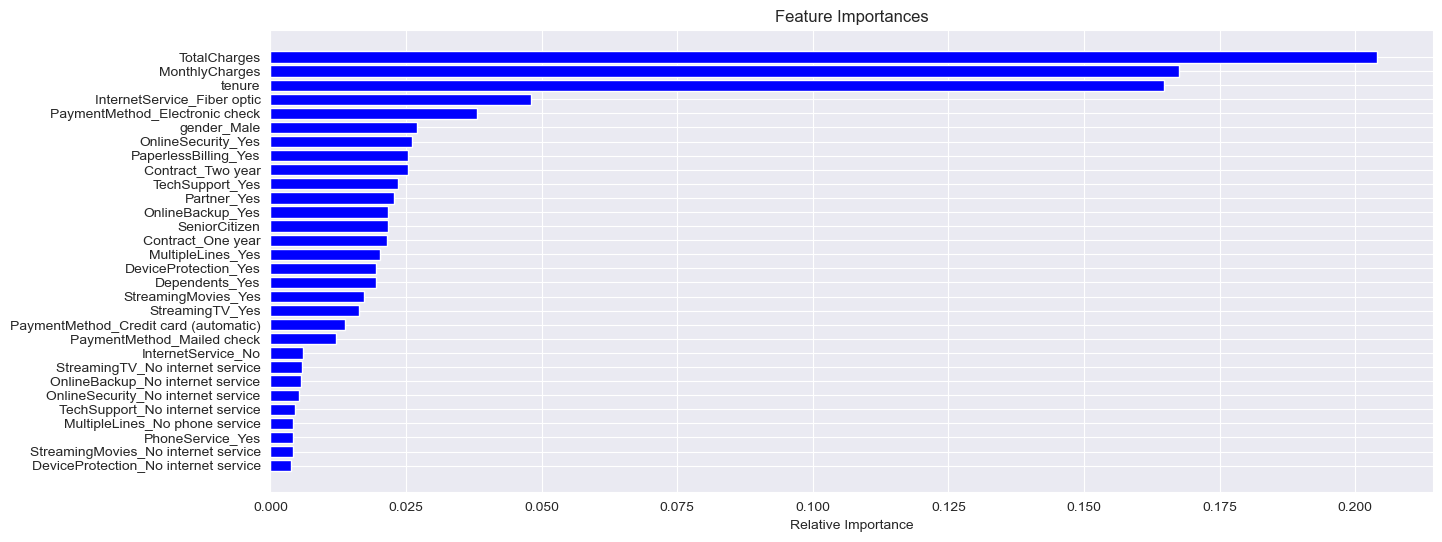

In [232]:
#initializing the min max scaler 
scaler = MinMaxScaler()

# Scale the features using MinMaxScaler
scaled_data = scaler.fit_transform(x)

# Initialize RandomForestClassifier
model = RandomForestClassifier()

# Fit the model
model.fit(scaled_data, y)


# Get feature importances
feature_names = list(x.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(15, 6))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='blue', align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

OBSERVATION
- The highest feature of importance is the total charges, followed by monthly charges, tenure, internet service fibre optics,
payment method electronic check, male gender and online security.

#### Training and validation of the model 


- slip data into test and train for 4 machine learning models 

In [ ]:
#split data into tes and train
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, train_size=0.7,random_state=1)

In [325]:
#converting the scaled data to dataframe
scaled_data = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [243]:
#splting the data in trainiing and evaluation set
x_train, x_test, y_train, y_test = train_test_split(scaled_data, y, train_size=0.3,random_state=1)

### Building the Machine Learning Models
- Logistic Regression model
- Decision Trees Classifier model
- Random Forest Classifier model
- Support Vector Machines model

In [248]:
#importing the model libraries 
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
from sklearn.svm import SVC
model = SVC()

In [308]:
#Creating the logistic regression model
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [284]:
#Creating a prediction file for the logic regression model
log_reg_pred = log_reg.predict(x_test)

#deducing the accuracy score of the logistic regression model
Reg_score = log_reg.score(x_test, y_test)

print('The logistic Regression model accuracy score is : ' + str(Reg_score))


The logistic Regression model accuracy score is : 0.8106786223761973


In [266]:
#Creating the Decision Trees Classifier model 
Dec_tree = DecisionTreeClassifier()
# train (fit) the model
Dec_tree.fit(x_train, y_train)

#creating a prediction file for the decsion tree model
Dec_tree_pred = Dec_tree.predict(x_test)

#decucing the accuracy score of the decision trees model
Dec_tree_score = Dec_tree.score(x_test, y_test)
print('The Decision Trees model acccuracy score is ' + str(Dec_tree_score))


The Decision Trees model acccuracy score is 0.7212145914000407


In [271]:
#Creating the Random Forest Calssifier model
Rand_for = RandomForestClassifier(n_estimators=100, random_state=42)

# train (fit) the model
Rand_for.fit(x_train, y_train)

#creating a prediction file for the Random forest  model
Rand_for_pred = Rand_for.predict(x_test)

#deducing the accuracy score of the random forest model
Rand_for_score = Rand_for.score(x_test, y_test)
print ('the accuracy of the Random Forest prediction is : ' + str(Rand_for_score))

the accuracy of the Random Forest prediction is : 0.7917261055634808


In [275]:
#Creating the support vector machine learning model
Supp_vec = SVC(kernel='rbf', C=1.0, gamma='scale') 
# train (fit) the model
Supp_vec.fit(x_train, y_train)

#creating a prediction file for the support vector model
Supp_vec_pred = Supp_vec.predict(x_test)

#decucing the accuracy score of the decision trees model
Supp_vec_score = Supp_vec.score(x_test, y_test)
print('The Support Vector model acccuracy score is ' + str(Supp_vec_score))


The Support Vector model acccuracy score is 0.8017118402282454


### Model Evaluation Phase
- Using the confusion matrix and classification report for model evaluation

In [286]:
#classification report and confusion matrix for the logistic regression model

#classification report
report1 = classification_report(y_test, log_reg_pred)
print(report1)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      3649
           1       0.65      0.57      0.61      1258

    accuracy                           0.81      4907
   macro avg       0.75      0.73      0.74      4907
weighted avg       0.80      0.81      0.81      4907



In [ ]:
OBSERVATIONS
- The precision of 86% and a recall of 89% the f1 score is 88% acheiving a good balance between recall and precision
for class o
- The precision of 65% and a recall of 57% the f1 score is 61% acheiving a average perfomance balance between
recall and precision for class 1
- Overall, the weighted average metrics (precision, recall, and F1-score) provide a balanced view considering
the class imbalances.

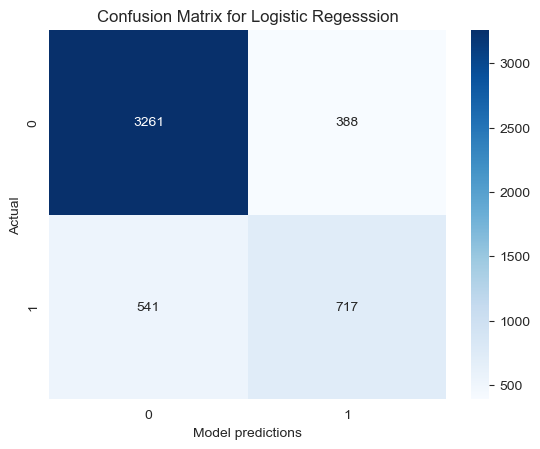

In [295]:
#confusion matrix for the logistic regression model
matrix1 = confusion_matrix(y_test, log_reg_pred)

#Visualize the confusion matrix
sns.heatmap(matrix1, annot=True, cmap = 'Blues', fmt = 'g')
plt.xlabel ('Model predictions')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regesssion')
plt.show()

In [ ]:
OBSERVATIONS
- The model predicted 3261 correct predictions(true positive) and 717 predictions (true negative)
- The model predicted incorrect predictions of 541 (false positive) and 388 (false negative)
- Overall, the prediction perfmance of ths model is good. 

In [297]:
#classification report and confusion matrix for the DecisionTreeClassifier model

#classification report
report1 = classification_report(y_test, Dec_tree_pred )
print(report1)

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      3649
           1       0.46      0.53      0.49      1258

    accuracy                           0.72      4907
   macro avg       0.65      0.66      0.65      4907
weighted avg       0.73      0.72      0.73      4907



In [ ]:
OBSERVATIONS
- The precision of 83% and a recall of 79% the f1 score is 81% acheiving a good balance between recall and precision
for class o
- The precision of 46% and a recall of 53% the f1 score is 49% acheiving a average perfomance balance between
recall and precision for class 1
- Overall, the weighted average metrics (precision, recall, and F1-score) provide a balanced view considering
the class imbalances.

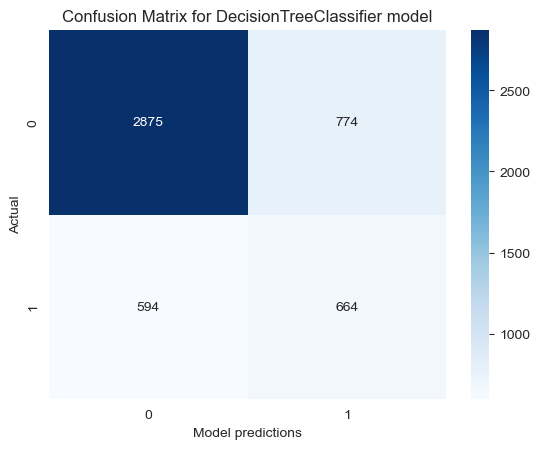

In [312]:
#confusion matrix for the DecisionTreeClassifier model
matrix1 = confusion_matrix(y_test, Dec_tree_pred)

#Visualize the confusion matrix
sns.heatmap(matrix1, annot=True, cmap = 'Blues', fmt = 'g')
plt.xlabel ('Model predictions')
plt.ylabel('Actual')
plt.title('Confusion Matrix for DecisionTreeClassifier model')
plt.show()

In [ ]:
OBSERVATIONS
- The model predicted 2875 correct predictions(true positive) and 664 predictions (true negative).
- The model predicted incorrect predictions of 594 (false positive) and 774 (false negative) predictions.
- Overall, the prediction perfomance of this model is good. 

In [300]:
#classification report and confusion matrix RandomForestClassifier  model

#classification report
report1 = classification_report(y_test, Rand_for_pred )
print(report1)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      3649
           1       0.61      0.52      0.56      1258

    accuracy                           0.79      4907
   macro avg       0.73      0.70      0.71      4907
weighted avg       0.78      0.79      0.79      4907



In [ ]:
OBSERVATIONS
- The precision of 84% and a recall of 89% the f1 score is 86% acheiving a good balance between recall and precision
for class o
- The precision of 46% and a recall of 53% the f1 score is 49% acheiving a average perfomance balance between
recall and precision for class 1
- Overall, the weighted average metrics (precision, recall, and F1-score) provide a balanced view considering
the class imbalances.

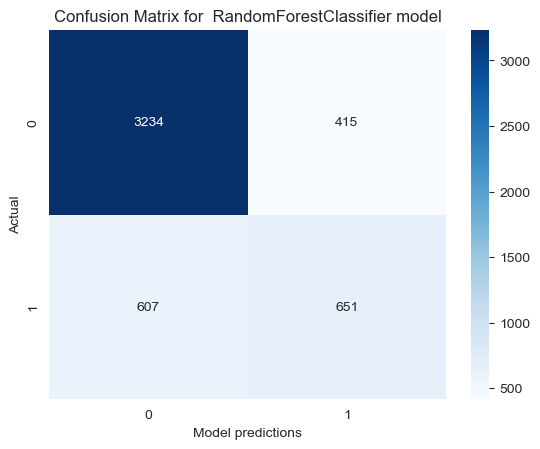

In [302]:
#confusion matrix for the RandomForestClassifier model
matrix1 = confusion_matrix(y_test, Rand_for_pred)

#Visualize the confusion matrix
sns.heatmap(matrix1, annot=True, cmap = 'Blues', fmt = 'g')
plt.xlabel ('Model predictions')
plt.ylabel('Actual')
plt.title('Confusion Matrix for  RandomForestClassifier model')
plt.show()

In [ ]:
OBSERVATIONS
- The model predicted 3234 correct predictions(true positive) and 651 predictions (true negative).
- The model predicted incorrect predictions of 607 (false positive) and 415 (false negative) predictions.
- Overall, the prediction perfomance of this model is good. 

In [303]:
#classification report and confusion matrix support vector machines  model

#classification report
report1 = classification_report(y_test, Supp_vec_pred )
print(report1)

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      3649
           1       0.65      0.50      0.56      1258

    accuracy                           0.80      4907
   macro avg       0.74      0.70      0.72      4907
weighted avg       0.79      0.80      0.79      4907



In [ ]:
OBSERVATIONS
- The precision of 84% and a recall of 91% the f1 score is 87% acheiving a good balance between recall and precision
for class o
- The precision of 65% and a recall of 50% the f1 score is 56% acheiving a average perfomance balance between
recall and precision for class 1
- Overall, the weighted average metrics (precision, recall, and F1-score) provide a balanced view considering
the class imbalances.

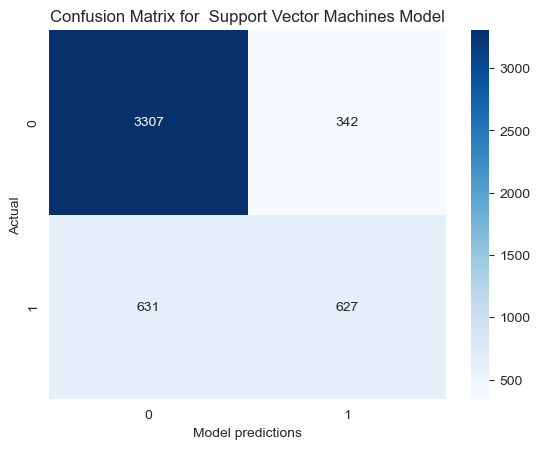

In [306]:
#confusion matrix for the RandomForestClassifier model
matrix1 = confusion_matrix(y_test, Supp_vec_pred)

#Visualize the confusion matrix
sns.heatmap(matrix1, annot=True, cmap = 'Blues', fmt = 'g')
plt.xlabel ('Model predictions')
plt.ylabel('Actual')
plt.title('Confusion Matrix for  Support Vector Machines Model')
plt.show()

OBSERVATION 
- The model predicted 3304 correct predictions(true positive) and 627 predictions (true negative).
- The model predicted incorrect predictions of 631 (false positive) and 342 (false negative) predictions.
- Overall, the prediction perfomance of this model is good. 

### Accuracy standing of all models
* Logistic Regression model - 81% 
* Decision Trees Classifier model -72%
* Random Forest Classifier model - 79%
* Support Vector Machines model - 80%

The Logistic Regression Model is the best based on accuracy 

### Accuracy trade-offs between true positives and true negatives.
* Logistic Regression model - 3261 (true positive) and 717 (true negative)
* Decision Trees Classifier model - 2875 (true positive) and 664 (true negative)
* Random Forest Classifier model - 3234 (true positive) and 651 (true negative)
* Support Vector Machines model -  3304 (true positive) and 627 (true negative)

The logistic Regression Model is the best based on true positive and true negative preditions 

### Accuracy trade-offs between false positives and false negatives.
* Logistic Regression model - 541 (false positive) and 388 (false negative)
* Decision Trees Classifier model - 594 (false positive) and 774 (false negative)
* Random Forest Classifier model - 607 (false positive) and 415 (false negative)
* Support Vector Machines model - 631 (false positive) and 342 (false negative)

The Logistic Regression Molde is the best based on fales positive and false negative predictions


#### The matrix that are most important for the problem are the true positve and true negative matrixes.
The business should be moreconcerned with results on true positives as this matrix is of higher value and the number of 
customers no to churn is much more than the customer yes to churn.